# IMPORTING LIBRAIRES

In [1]:
import cv2
import mediapipe as mp
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MinMaxScaler

# DATA VISUALIZATION

<Figure size 1500x1500 with 0 Axes>

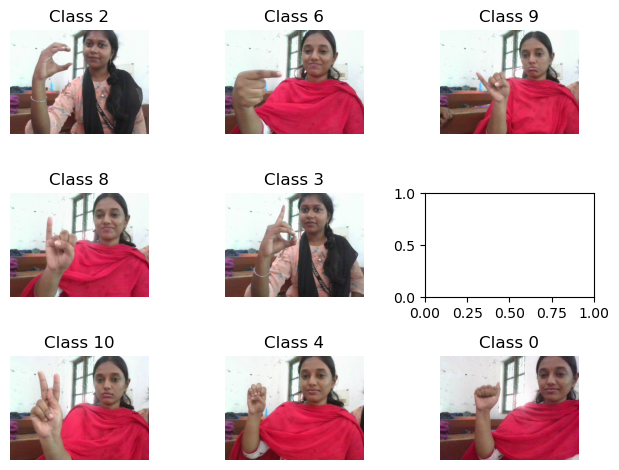

In [2]:
dataset_folder = 'C:/Users/melvi/OneDrive/Desktop/Sign Recognition/images/sign-images'
all_classes = os.listdir(dataset_folder)

selected_classes = random.sample([class_id for class_id in all_classes if 
                                  os.path.isdir(os.path.join(dataset_folder, class_id))], 9)

plt.figure(figsize=(15, 15))
fig, axes = plt.subplots(3, 3)

axes = axes.flatten()

for i, class_id in enumerate(selected_classes):
    
    class_folder = os.path.join(dataset_folder, class_id)

    img_files = os.listdir(class_folder)

    if img_files:
        img_name = random.choice(img_files)
        image_path = os.path.join(class_folder, img_name)

        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img_rgb)
        axes[i].set_title(f"Class {class_id}")
        axes[i].axis('off')

plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

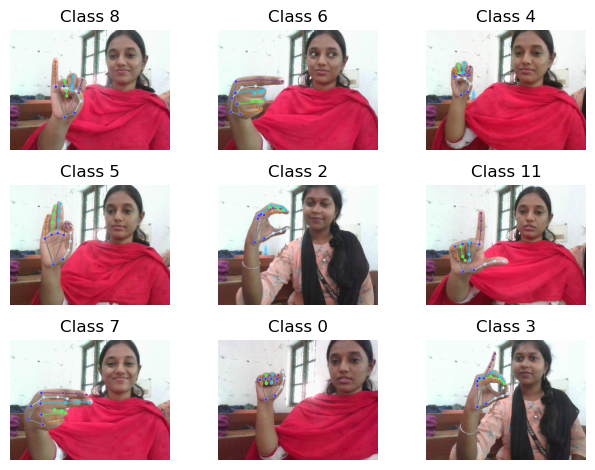

In [3]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

selected_classes = random.sample([class_id for class_id in all_classes if 
                                  os.path.isdir(os.path.join(dataset_folder, class_id))], 9)

plt.figure(figsize=(20, 20))
fig, axes = plt.subplots(3, 3)

axes = axes.flatten()

for i, class_id in enumerate(selected_classes):
    class_folder = os.path.join(dataset_folder, class_id)

    img_files = os.listdir(class_folder)

    if img_files:
        img_name = random.choice(img_files)
        image_path = os.path.join(class_folder, img_name)

        img_bgr = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        
        results = hands.process(img_rgb)
        
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
            img_rgb,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style()
            )
            
            axes[i].imshow(img_rgb)
            axes[i].set_title(f"Class {class_id}")
            axes[i].axis('off')

plt.tight_layout()
plt.show()

# DATA AUGMENTATION

In [5]:
datagen = ImageDataGenerator(
    zca_whitening=True, 
    rotation_range=20, 
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    brightness_range=[0.5, 1.5], 
    shear_range=10, 
    zoom_range=0.2, 
    channel_shift_range=0.1,  
    horizontal_flip=True, 
    vertical_flip=True
)

c:\Users\melvi\anaconda3\lib\site-packages\keras\src\preprocessing\image.py:1444: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn(


<Figure size 1500x1500 with 0 Axes>

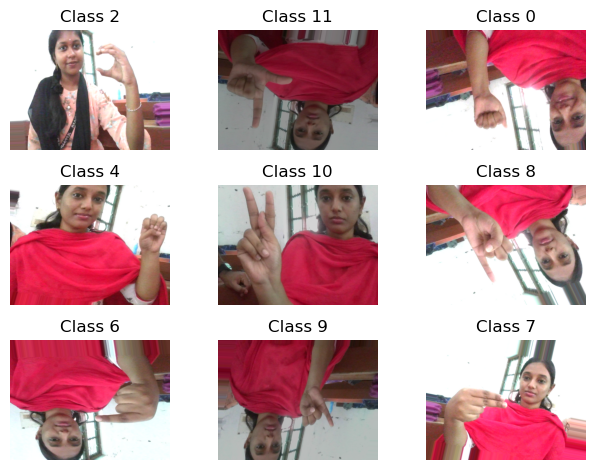

In [8]:
all_classes = os.listdir(dataset_folder)
selected_classes = random.sample([class_id for class_id in all_classes if 
                                  os.path.isdir(os.path.join(dataset_folder, class_id))], 9)

plt.figure(figsize=(15, 15))
fig, axes = plt.subplots(3, 3)

axes = axes.flatten()

for i, class_id in enumerate(selected_classes):
    class_folder = os.path.join(dataset_folder, class_id)
    
    if not os.path.isdir(class_folder):
        continue

    image_name = random.choice(os.listdir(class_folder))
    image_path = os.path.join(class_folder, image_name)

    frame = cv2.imread(image_path)

    frame = frame.reshape((1,) + frame.shape)
    augmented_frames = datagen.flow(frame, batch_size=1)

    augmented_frame = next(augmented_frames)[0].astype(np.uint8)

    rgb_frame = cv2.cvtColor(augmented_frame, cv2.COLOR_BGR2RGB)

    axes[i].imshow(rgb_frame)
    axes[i].set_title(f"Class {class_id}")
    axes[i].axis('off') 
        
plt.tight_layout()
plt.show()

In [8]:
data = []
labels = []

for class_id in os.listdir(dataset_folder):
    class_folder = os.path.join(dataset_folder, class_id)
    
    if not os.path.isdir(class_folder):
        continue

    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)

        frame = cv2.imread(image_path)

        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        results = hands.process(rgb_frame)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                coordinates = []
                for landmark in hand_landmarks.landmark:
                    x = landmark.x
                    y = landmark.y
                    coordinates.extend([x, y])

                data.append(coordinates)
                labels.append(class_id)

In [9]:
augmented_data = []
augmented_labels = []

for class_id in os.listdir(dataset_folder):
    class_folder = os.path.join(dataset_folder, class_id)
    
    if not os.path.isdir(class_folder):
        continue

    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)

        frame = cv2.imread(image_path)

        frame = frame.reshape((1,) + frame.shape) 
        augmented_frames = datagen.flow(frame, batch_size=1)

        augmented_frame = next(augmented_frames)[0].astype(np.uint8)

        rgb_frame = cv2.cvtColor(augmented_frame, cv2.COLOR_BGR2RGB)

        results = hands.process(rgb_frame)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                coordinates = []
                for landmark in hand_landmarks.landmark:
                    x = landmark.x
                    y = landmark.y
                    coordinates.extend([x, y])

                augmented_data.append(coordinates)
                augmented_labels.append(class_id)

data = np.vstack([data, augmented_data])
labels = labels + augmented_labels

In [10]:
data_array = np.array(data)

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(data_array)


In [11]:
data_array

array([[0.30099523, 0.66470051, 0.3651002 , ..., 0.495823  , 0.27732909,
        0.50655204],
       [0.272017  , 0.61869907, 0.34207183, ..., 0.46459952, 0.25423616,
        0.47434881],
       [0.28689983, 0.59525549, 0.3523376 , ..., 0.4356513 , 0.27336407,
        0.44917631],
       ...,
       [0.43537146, 0.83099222, 0.47452378, ..., 0.60004014, 0.18655074,
        0.56806713],
       [0.5543763 , 0.04697499, 0.51388669, ..., 0.29406995, 0.78384805,
        0.33597371],
       [0.57560039, 0.06252605, 0.60418379, ..., 0.20600682, 0.21647762,
        0.22886823]])

In [12]:
labels

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1'

# SPLITTING THE DATASET

In [13]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.preprocessing import LabelEncoder

In [14]:
data_array = np.array(data)
labels_array = np.array(labels)

# le=LabelEncoder()
# labels_array =le.fit_transform(labels_array)

In [15]:
labels_array

array(['0', '0', '0', ..., '9', '9', '9'], dtype='<U2')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_array, labels_array, test_size = 0.2)

In [17]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [18]:
X_train.shape[1]

42

# MODEL DECLARATION AND COMPILATION

In [19]:
model = Sequential([
          Dense(units=64, input_dim=X_train.shape[1], activation='relu'),
          Dropout(0.2),
          Dense(units=32, activation='relu'),
          Dense(units=len(np.unique(labels)), activation='softmax')])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])




# MODEL TRAINING

In [37]:
training=model.fit(X_train, y_train,  epochs=500, validation_split=0.2)

Epoch 1/500
124/124 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9757 - val_loss: 0.0352 - val_accuracy: 0.9929
Epoch 2/500
124/124 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.9742 - val_loss: 0.0342 - val_accuracy: 0.9919
Epoch 3/500
124/124 [==============================] - 0s 3ms/step - loss: 0.0709 - accuracy: 0.9730 - val_loss: 0.0326 - val_accuracy: 0.9919
Epoch 4/500
124/124 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9737 - val_loss: 0.0276 - val_accuracy: 0.9970
Epoch 5/500
124/124 [==============================] - 0s 3ms/step - loss: 0.0664 - accuracy: 0.9747 - val_loss: 0.0351 - val_accuracy: 0.9919
Epoch 6/500
124/124 [==============================] - 0s 3ms/step - loss: 0.0681 - accuracy: 0.9760 - val_loss: 0.0313 - val_accuracy: 0.9919
Epoch 7/500
124/124 [==============================] - 0s 3ms/step - loss: 0.0758 - accuracy: 0.9702 - val_loss: 0.0360 - val_accuracy: 0.9929

# EVALUATION

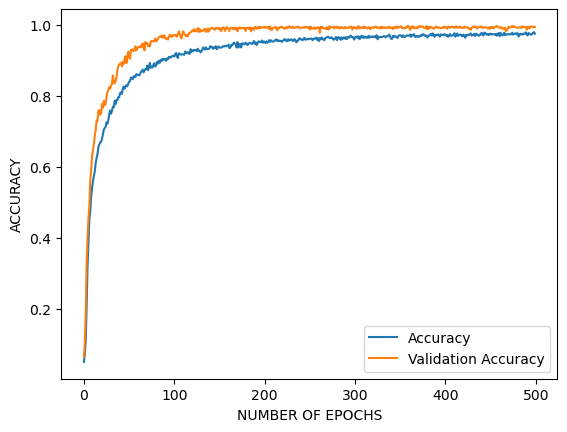

In [47]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.xlabel("NUMBER OF EPOCHS")
plt.ylabel("ACCURACY")
plt.show()

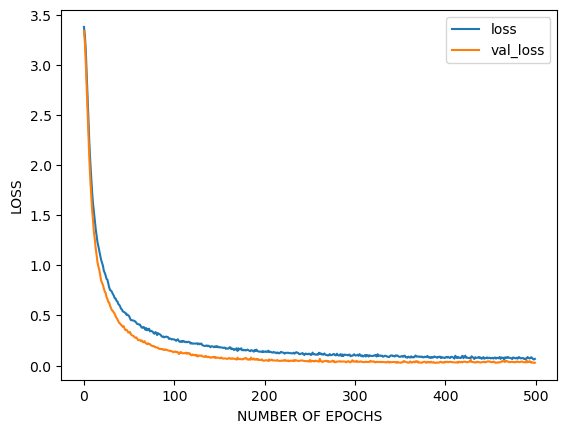

In [26]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel("NUMBER OF EPOCHS")
plt.ylabel("LOSS")
plt.show()

# SAVING THE MODEL 

In [ ]:
model.save('sign_model-3.h5',overwrite=True)